# KNN Algorithm
A Jupyter Notebook for demonstrating the KNN algorithm for classifying flowers in the Iris Dataset (https://archive.ics.uci.edu/ml/datasets/iris) into 3 classes - ['Iris Setosa', 'Iris Versicolour', 'Iris Virginica'].

In [1]:
# Imports
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

### Dataset Setup

In [2]:
# Loading from URL to Pandas Dataframe.

# dataset URL
IRIS_URL = 'https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data'

print(
"""
Attributes in IRIS dataset (refer https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names):
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica
"""
)

# column names
COLUMN_NAMES = ['sepal-length', 'sepal-width', 'petal-length', 'petal-width', 'Class']

# Read dataset to pandas dataframe.
dataset = pd.read_csv(IRIS_URL, names=COLUMN_NAMES)

# verify loaded dataset
print('\nLoaded dataset in Pandas Dataframe:\n')
dataset.info()


Attributes in IRIS dataset (refer https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.names):
   1. sepal length in cm
   2. sepal width in cm
   3. petal length in cm
   4. petal width in cm
   5. class: 
      -- Iris Setosa
      -- Iris Versicolour
      -- Iris Virginica


Loaded dataset in Pandas Dataframe:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal-length    150 non-null float64
sepal-width     150 non-null float64
petal-length    150 non-null float64
petal-width     150 non-null float64
Class           150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [3]:
print('Sample entries in dataset')
# first 5 entries
dataset.head(n=5)

Sample entries in dataset


,sepal-length,sepal-width,petal-length,petal-width,Class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
# dataset statistics 
def classwise_means(df):
    """Prints classwise averages for attributes present in the dataset (df)."""
    print('Classes in dataset: ')
    class_labels = df['Class'].unique()
    print(class_labels)
    print('\n')
    print('Class-wise Attribute Averages')
    print(df.groupby(['Class']).mean())

classwise_means(dataset)

Classes in dataset: 
['Iris-setosa' 'Iris-versicolor' 'Iris-virginica']


Class-wise Attribute Averages
                 sepal-length  sepal-width  petal-length  petal-width
Class                                                                
Iris-setosa             5.006        3.418         1.464        0.244
Iris-versicolor         5.936        2.770         4.260        1.326
Iris-virginica          6.588        2.974         5.552        2.026


### Dataset Preprocessing

In [5]:
# Split data into Features, Labels

# first 4 columns correspond to features, 5th column contains the class labels
X = dataset.iloc[:, :4].values
Y = dataset.iloc[:, 4].values

In [6]:
# Train-Test split

# Following an 80-20 split on data.
# That is, 120 examples would be used as the training set with known labels,
# and performance of the KNN algorithm will be tested on the remaining 30 unseen examples.

# The dataset is shuffled with 10 as the random seed for reproducible results.
X_train, X_test, y_train, y_test = train_test_split(X, Y, shuffle=True, random_state=10, test_size=0.20)

print("Number of train samples: ", len(X_train))
print("Number of test samples: ", len(X_test))

Number of train samples:  120
Number of test samples:  30


In [7]:
# Feature normalization
# Refer to https://scikit-learn.org/stable/modules/preprocessing.html#standardization-or-mean-removal-and-variance-scaling
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

### Model Training and Predictions

#### K Nearest Neighbors classification

Neighbors-based classification is a type of instance-based learning or non-generalizing learning: it does not attempt to construct a general internal model, but simply stores instances of the training data. Classification is computed from a simple majority vote of the nearest neighbors of each point: a query point is assigned the data class which has the most representatives within the nearest neighbors of the point.

The k-neighbors classification in KNeighborsClassifier is the most commonly used technique. The optimal choice of the value k is highly data-dependent: in general a larger  suppresses the effects of noise, but makes the classification boundaries less distinct.

In [8]:
# Fit model to training data

# Refer: https://scikit-learn.org/stable/modules/neighbors.html#nearest-neighbors-classification and
# https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html#sklearn.neighbors.KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=4)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=4)

In [9]:
# Evaluate on test data 
y_pred = classifier.predict(X_test)

### Model Performance 

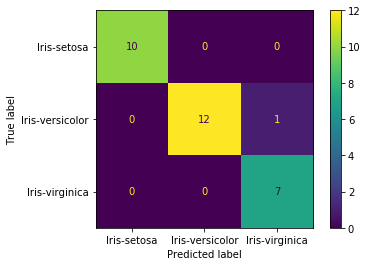

In [10]:
# Confusion Matrix
class_labels = dataset['Class'].unique()
cm = confusion_matrix(y_test, y_pred, labels=class_labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_labels)
disp.plot()

In [11]:
# Performance Statistics
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        10
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.88      1.00      0.93         7

       accuracy                           0.97        30
      macro avg       0.96      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30



### Effect of parameter 'K' (number of neighbours)

In [12]:
# line graph plot
def simple_line_plot(y_values, x_values, title, xtitle, ytitle):
    """Plots a lineplot for given data."""
    plt.figure(figsize=(10,5))
    plt.plot(x_values, y_values, marker='o')
    plt.title(title)
    plt.xlabel(xtitle)
    plt.ylabel(ytitle)
    plt.show()

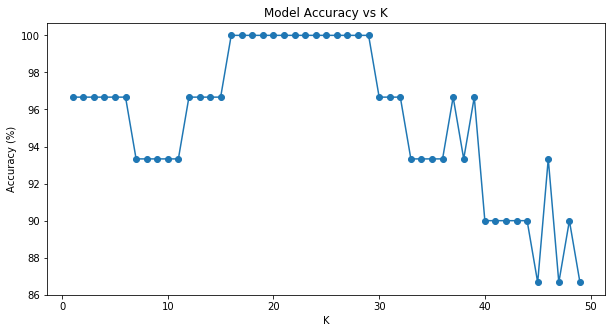

The model achieves 100% Test accuracy for K = [15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]


In [13]:
# testing out performance of the KNN algorithm for different values of K
accuracies = []

K_vals = list(range(1, 50))

for k in K_vals:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    accuracies.append((1-np.mean(pred_i != y_test))*100)
    
simple_line_plot(accuracies, K_vals, 'Model Accuracy vs K', 
                'K', 'Accuracy (%)')

accuracies=np.array(accuracies)

print("The model achieves 100% Test accuracy for K =", list(np.where(accuracies==100)[0]))